# Linear Regression Model
* This model is created with a dummy dataset - USA Housing.csv file *

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('USA_Housing.csv')
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


## EDA

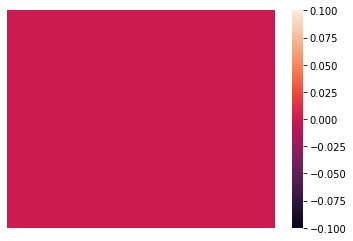

In [5]:
sns.heatmap(dataset.isnull(),xticklabels=False,yticklabels=False)

In [6]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

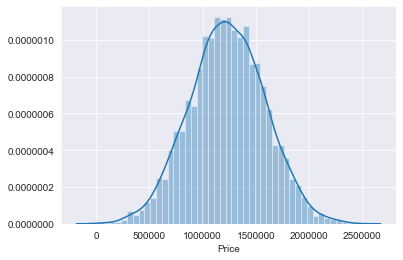

In [7]:
sns.set_style('darkgrid')
sns.distplot(dataset['Price'])

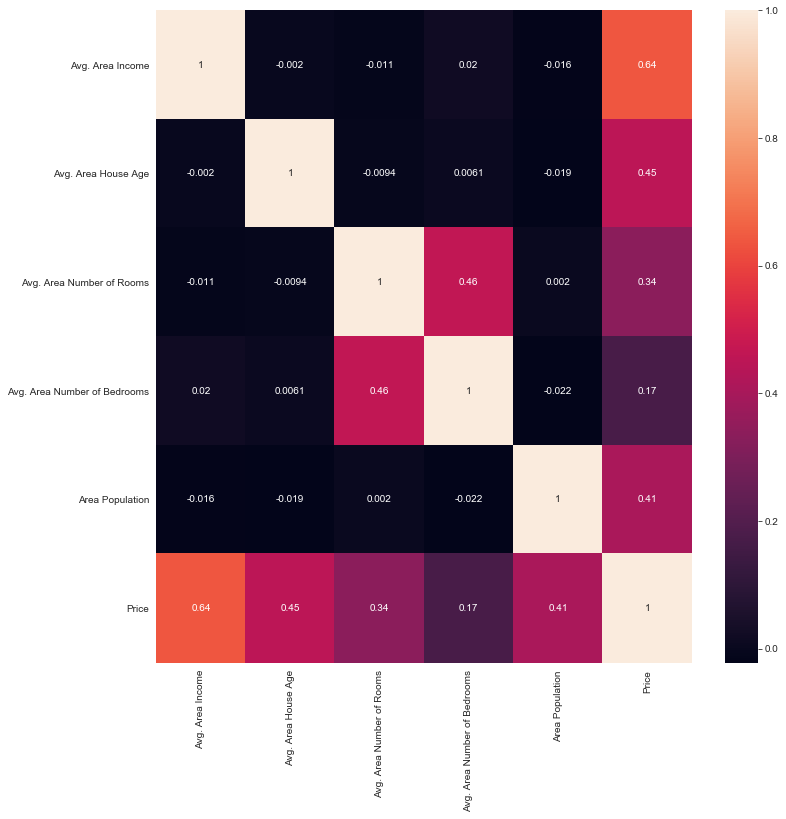

In [8]:
fig = plt.figure(figsize=(12,12))
data_corr = dataset.corr()
sns.heatmap(data_corr,annot = True)

* This dataset looks quite clean, and doesn't require to perform any kind of data cleaning / feature engineering steps *

In [9]:
X = dataset.drop(['Price','Address'],axis=1)
y = dataset['Price']
X,y

(      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
 0         79545.458574             5.682861                   7.009188   
 1         79248.642455             6.002900                   6.730821   
 2         61287.067179             5.865890                   8.512727   
 3         63345.240046             7.188236                   5.586729   
 4         59982.197226             5.040555                   7.839388   
 ...                ...                  ...                        ...   
 4995      60567.944140             7.830362                   6.137356   
 4996      78491.275435             6.999135                   6.576763   
 4997      63390.686886             7.250591                   4.805081   
 4998      68001.331235             5.534388                   7.130144   
 4999      65510.581804             5.992305                   6.792336   
 
       Avg. Area Number of Bedrooms  Area Population  
 0                             4.09     230

## Data Cleaning / Feature Engineering
* This dataset looks quite clean, with no further need of any feature engineering / data cleaning steps *

## Data Preparation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X_Train,X_Test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_Train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(model.intercept_,model.coef_)

-2641372.667301679 [2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [15]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [16]:
coef = pd.DataFrame(data=model.coef_,index=X.columns,columns=['Coefficents'])
coef

,Coefficents
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [17]:
predictions = model.predict(X_Test)
predictions

array([1258934.89505291,  822694.63411034, 1742214.39530127, ...,
       1452640.96473346,  645797.13026303, 1364943.76221896])

## Model Performance Measures

In [18]:
print(model.score(X_Test,y_test))

0.9185060945363612


In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,predictions),mean_absolute_error(y_test,predictions),mean_squared_error(y_test,predictions),
      np.sqrt(mean_squared_error(y_test,predictions)))

0.9185060945363612 81257.55795856068 10169125565.897734 100842.08231635111


In [20]:
mean_val = dataset['Price'].mean()
print((mean_absolute_error(y_test,predictions) * 100) / mean_val )
# MAE is 6.5% of mean value of label, which appears to be resonable. 

6.595192068045995


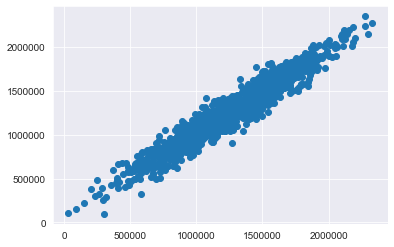

In [21]:
plt.scatter(x=y_test,y=predictions)

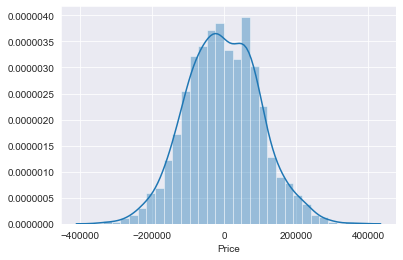

In [22]:
# residuals 
sns.distplot((y_test-predictions))

In [23]:
print(model.predict([X_Test.iloc[0,:]]),y_test.iloc[0] )

[1258934.89505291] 1251688.6157028743
